In [1]:
import os
import torch
import torchvision
import torch.nn as nn
import numpy as np
import torch.nn.functional as F
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, Dataset
import torchvision.transforms as tt
from torchvision.transforms import ToTensor
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Look into the data directory
data_dir = '../input/fruits/fruits-360'
print(os.listdir(data_dir))
classes = os.listdir(data_dir + "/Training")
print(classes)

['Test', 'papers', 'LICENSE', 'test-multiple_fruits', 'Training', 'readme.md']
['Grapefruit Pink', 'Apple Crimson Snow', 'Potato Red Washed', 'Pineapple', 'Cherry Wax Red', 'Fig', 'Peach Flat', 'Raspberry', 'Maracuja', 'Plum 2', 'Cactus fruit', 'Cherry 2', 'Mandarine', 'Grape White', 'Corn Husk', 'Grape Blue', 'Quince', 'Cucumber Ripe', 'Pear Kaiser', 'Cherry Wax Yellow', 'Avocado ripe', 'Grape White 2', 'Grapefruit White', 'Watermelon', 'Pepino', 'Onion Red Peeled', 'Apple Red Delicious', 'Salak', 'Mango Red', 'Apple Pink Lady', 'Physalis with Husk', 'Pineapple Mini', 'Pear Red', 'Nectarine Flat', 'Onion Red', 'Tamarillo', 'Peach', 'Tomato Yellow', 'Potato Sweet', 'Banana Red', 'Beetroot', 'Apple Red 2', 'Nut Pecan', 'Cauliflower', 'Apple Golden 1', 'Onion White', 'Tomato 2', 'Physalis', 'Grape White 4', 'Nut Forest', 'Redcurrant', 'Apple Red Yellow 1', 'Dates', 'Cocos', 'Tomato 3', 'Apple Granny Smith', 'Kiwi', 'Apple Red Yellow 2', 'Pear Forelle', 'Cherry 1', 'Cantaloupe 2', 'Nectar

In [3]:
project_name='Course_Project_Fruits_2'

In [4]:
train_ds = ImageFolder(data_dir+'/Training', transform=ToTensor())
test_ds = ImageFolder(data_dir+'/Test', transform=ToTensor())
len(train_ds), len(test_ds)

(67692, 22688)

In [5]:
classes = train_ds.classes
classes

['Apple Braeburn',
 'Apple Crimson Snow',
 'Apple Golden 1',
 'Apple Golden 2',
 'Apple Golden 3',
 'Apple Granny Smith',
 'Apple Pink Lady',
 'Apple Red 1',
 'Apple Red 2',
 'Apple Red 3',
 'Apple Red Delicious',
 'Apple Red Yellow 1',
 'Apple Red Yellow 2',
 'Apricot',
 'Avocado',
 'Avocado ripe',
 'Banana',
 'Banana Lady Finger',
 'Banana Red',
 'Beetroot',
 'Blueberry',
 'Cactus fruit',
 'Cantaloupe 1',
 'Cantaloupe 2',
 'Carambula',
 'Cauliflower',
 'Cherry 1',
 'Cherry 2',
 'Cherry Rainier',
 'Cherry Wax Black',
 'Cherry Wax Red',
 'Cherry Wax Yellow',
 'Chestnut',
 'Clementine',
 'Cocos',
 'Corn',
 'Corn Husk',
 'Cucumber Ripe',
 'Cucumber Ripe 2',
 'Dates',
 'Eggplant',
 'Fig',
 'Ginger Root',
 'Granadilla',
 'Grape Blue',
 'Grape Pink',
 'Grape White',
 'Grape White 2',
 'Grape White 3',
 'Grape White 4',
 'Grapefruit Pink',
 'Grapefruit White',
 'Guava',
 'Hazelnut',
 'Huckleberry',
 'Kaki',
 'Kiwi',
 'Kohlrabi',
 'Kumquats',
 'Lemon',
 'Lemon Meyer',
 'Limes',
 'Lychee',
 'M

In [6]:
num_classes = len(classes)
num_classes

131

In [7]:
img, label = train_ds[0]
img_shape = img.shape
img_shape

torch.Size([3, 100, 100])

Label (numeric): 0
Label (textual): Apple Braeburn


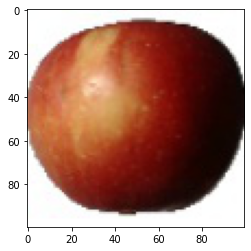

In [8]:
img, label = train_ds[0]
plt.imshow(img.permute((1, 2, 0)))
print('Label (numeric):', label)
print('Label (textual):', classes[label])

In [9]:
!pip install jovian --upgrade --quiet

In [10]:
import jovian

<IPython.core.display.Javascript object>

In [11]:
jovian.commit(project=project_name, environment=None)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Detected Kaggle notebook...
[jovian] Please enter your API key ( from https://jovian.ml/ ):
API KEY: ········
[jovian] Uploading notebook to https://jovian.ml/aaryanreegmi39/Course_Project_Fruits_2


<IPython.core.display.Javascript object>

In [12]:
torch.manual_seed(43)
val_size = 7692
train_size = len(train_ds) - val_size

In [13]:
from torch.utils.data import random_split

In [14]:
train_ds, val_ds = random_split(train_ds, [train_size, val_size])
len(train_ds), len(val_ds)

(60000, 7692)

In [15]:
batch_size=128

In [16]:
train_loader = DataLoader(train_ds, batch_size, shuffle=True, num_workers=4, pin_memory=True)
val_loader = DataLoader(val_ds, batch_size*2, num_workers=4, pin_memory=True)
test_loader = DataLoader(test_ds, batch_size*2, num_workers=4, pin_memory=True)

images.shape: torch.Size([128, 3, 100, 100])


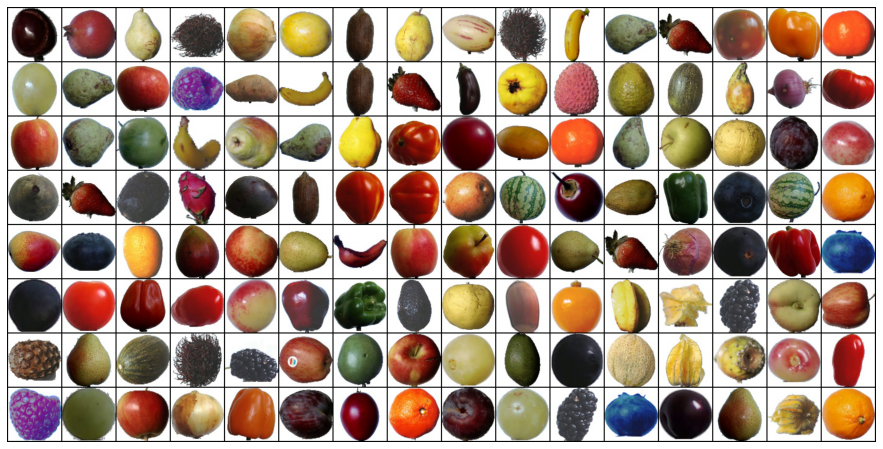

In [17]:
for images, _ in train_loader:
    print('images.shape:', images.shape)
    plt.figure(figsize=(16,8))
    plt.axis('off')
    plt.imshow(make_grid(images, nrow=16).permute((1, 2, 0)))
    break

In [18]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [19]:
class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss, 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))

In [20]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [21]:
torch.cuda.is_available()

True

In [22]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')

In [23]:
device = get_default_device()
device


device(type='cuda')

In [24]:
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [25]:
def plot_losses(history):
    losses = [x['val_loss'] for x in history]
    plt.plot(losses, '-x')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.title('Loss vs. No. of epochs');

In [26]:
def plot_accuracies(history):
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');

In [27]:
train_loader = DeviceDataLoader(train_loader, device)
val_loader = DeviceDataLoader(val_loader, device)
test_loader = DeviceDataLoader(test_loader, device)

In [28]:
input_size = 3*100*100
output_size = 131

In [29]:
class FRUIT360(ImageClassificationBase):
    def __init__(self):
        super().__init__()
        
        self.linear1 = nn.Linear(input_size, 9000)
        
        #Hidden layers
        self.linear2 = nn.Linear(9000, 3000)
        self.linear3 = nn.Linear(3000, 500)
        
        #Output Layer
        self.linear4 = nn.Linear(500, output_size)
        
    def forward(self, xb):
        
        out = xb.view(xb.size(0), -1)
        
        out = self.linear1(out)
        out = F.relu(out)
        
        out = self.linear2(out)
        out = F.relu(out)
        
        out = self.linear3(out)
        out = F.relu(out)
        
        out = self.linear4(out)
        out = F.relu(out)
        
        return out

In [30]:
model = to_device(FRUIT360(), device)

In [31]:
history = [evaluate(model, val_loader)]
history

[{'val_loss': 4.8747687339782715, 'val_acc': 0.009702621027827263}]

In [32]:
history += fit(10, 0.005, model, train_loader, val_loader)

Epoch [0], val_loss: 4.7863, val_acc: 0.0554
Epoch [1], val_loss: 4.5058, val_acc: 0.1184
Epoch [2], val_loss: 4.0586, val_acc: 0.2448
Epoch [3], val_loss: 3.6211, val_acc: 0.3404
Epoch [4], val_loss: 3.2537, val_acc: 0.4162
Epoch [5], val_loss: 2.9479, val_acc: 0.4707
Epoch [6], val_loss: 2.7274, val_acc: 0.5216
Epoch [7], val_loss: 2.5952, val_acc: 0.5410
Epoch [8], val_loss: 2.4973, val_acc: 0.5474
Epoch [9], val_loss: 2.3510, val_acc: 0.5718


In [33]:
history += fit(5, 0.005, model, train_loader, val_loader)

Epoch [0], val_loss: 2.2898, val_acc: 0.5805
Epoch [1], val_loss: 2.2550, val_acc: 0.5762
Epoch [2], val_loss: 2.2996, val_acc: 0.5595
Epoch [3], val_loss: 2.1620, val_acc: 0.5900
Epoch [4], val_loss: 2.1499, val_acc: 0.5835


In [34]:
history += fit(1, 0.005, model, train_loader, val_loader)

Epoch [0], val_loss: 2.1216, val_acc: 0.5922


In [35]:
history += fit(5, 0.0005, model, train_loader, val_loader)

Epoch [0], val_loss: 2.0321, val_acc: 0.6118
Epoch [1], val_loss: 2.0283, val_acc: 0.6119
Epoch [2], val_loss: 2.0262, val_acc: 0.6125
Epoch [3], val_loss: 2.0229, val_acc: 0.6138
Epoch [4], val_loss: 2.0216, val_acc: 0.6130


In [36]:
history += fit(5, 0.0005, model, train_loader, val_loader)

Epoch [0], val_loss: 2.0175, val_acc: 0.6142
Epoch [1], val_loss: 2.0171, val_acc: 0.6127
Epoch [2], val_loss: 2.0146, val_acc: 0.6133
Epoch [3], val_loss: 2.0107, val_acc: 0.6144
Epoch [4], val_loss: 2.0082, val_acc: 0.6144


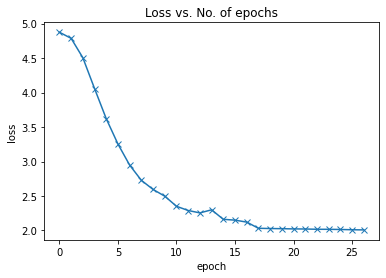

In [37]:
plot_losses(history)

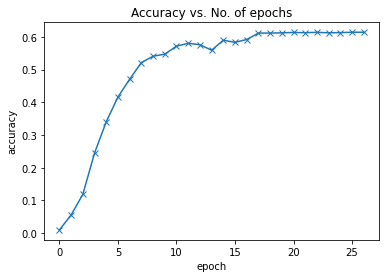

In [38]:
plot_accuracies(history)

In [39]:
evaluate(model, test_loader)

{'val_loss': 2.361624002456665, 'val_acc': 0.5486481785774231}

In [40]:
torch.save(model.state_dict(), 'Course_Project_Fruits_2.pth')

In [41]:
jovian.commit(project=project_name, outputs=['cifar10-feedforward.pth'], environment=None)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Detected Kaggle notebook...
[jovian] Uploading notebook to https://jovian.ml/aaryanreegmi39/Course_Project_Fruits_2


<IPython.core.display.Javascript object>